# Main Library 

In [1]:
# Reading Data & Visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings


# Model ==> Kmeans ++
from sklearn.cluster import KMeans

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

data = pd.read_csv(r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Mall Customer Segmentation Data\Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# data = data.drop(columns="CustomerID", axis=1)

In [4]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Make_Cluster & KMeans In Annual Income (k$) & Spending Score (1-100)

In [9]:
X = data.iloc[:, [3,4]].values

X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\osama\anaconda3\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 22.3.1
   setuptools: 65.6.3
        numpy: 1.23.5
        scipy: 1.10.1
       Cython: None
       pandas: 2.0.2
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True


AttributeError: 'NoneType' object has no attribute 'split'

In [8]:
n_group = []
cost = []
for i in range(1, 10):
    model = KMeans(n_clusters=i, init="k-means++", random_state=0)
    model.fit(X)

    n_group.append(i)
    cost.append(model.inertia_)

plt.plot(n_group, cost, 
         marker="o",
         c="green", 
         linestyle=":", 
         markerfacecolor="red", 
         markersize=10, 
         markeredgewidth=0.01)
plt.grid()
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [44]:
Kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)

Y = Kmeans.fit_predict(X)

In [45]:
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


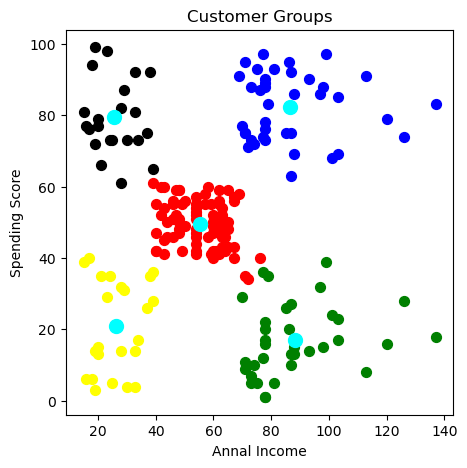

In [46]:
plt.figure(figsize=(5, 5))

plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="green", label="cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="red", label="cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="Blue", label="cluster 3")
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="black", label="cluster 4")
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c="yellow", label="cluster 5")


plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:, 1], s=100, c="cyan", label="centroids")

plt.title("Customer Groups")
plt.xlabel("Annal Income")
plt.ylabel("Spending Score")

plt.show()